In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('home_data.csv')

Analysing Data

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [10]:
df = df.drop(['id', 'date'], axis = 1)

Visualising Data

In [11]:
built_yr = df.groupby('yr_built')['price'].mean()

In [12]:
renovate_df = df[df['yr_renovated'] != 0]
renovate_yr = renovate_df.groupby('yr_renovated')['price'].mean()

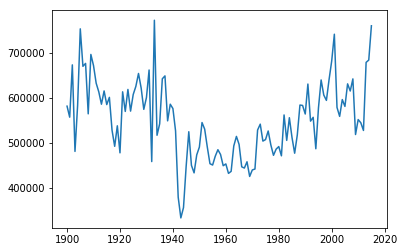

In [13]:
plt.plot(built_yr)

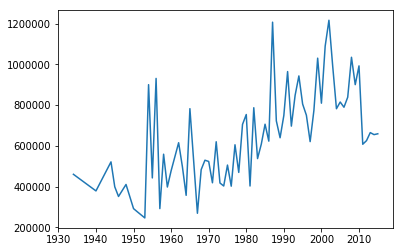

In [14]:
plt.plot(renovate_yr)

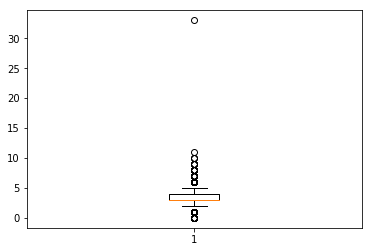

In [15]:
plt.boxplot(df['bedrooms'])
plt.show()

In [16]:
df = df[df['bedrooms'] < 20]

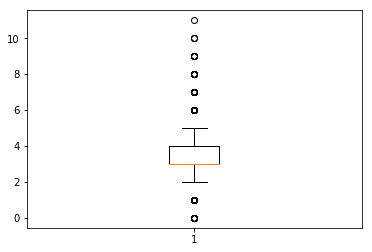

In [17]:
plt.boxplot(df['bedrooms'])
plt.show()

In [18]:
df['bathrooms'] = df['bathrooms'].astype(np.int64)

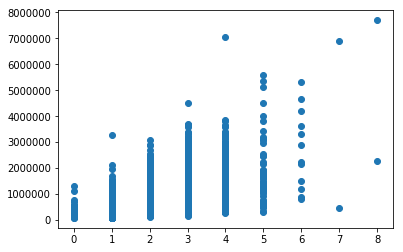

In [19]:
plt.scatter(df['bathrooms'], df['price'])
plt.show()

Machine Learning Algoritms

In [20]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=13)

In [23]:
# Multiple Linear Regression
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print('Slope = {}, Intercept = {}'.format(reg.coef_, reg.intercept_))

Slope = [[-0.08661163  0.09670207  0.20154116  0.01487949  0.01591351  0.13968111
   0.10268979  0.05064029  0.32083882  0.18382174  0.07430299 -0.20935879
   0.02537375 -0.08264208  0.22442743 -0.0765242   0.05702713 -0.02623076
   0.03768262]], Intercept = [-0.00229962]


In [25]:
pred_y = reg.predict(test_x)

In [26]:
pred_y[:5]

array([[-0.18622546],
       [-0.56159846],
       [-0.21808257],
       [-0.17245445],
       [ 0.5806012 ]])

In [27]:
mean_absolute_error(test_y, pred_y)

0.34664756682477643

In [28]:
r2_score(test_y, pred_y)

0.6977364072387973

In [29]:
# Polynomial Regression
polynomial_features= PolynomialFeatures(degree=3)
poly_x = polynomial_features.fit_transform(X)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(poly_x,y,test_size=0.25,random_state=13)

In [31]:
reg_2 = LinearRegression().fit(x_train, y_train)

In [32]:
pred_y_2 = reg_2.predict(x_test)

In [33]:
print('Slope = {}, Intercept = {}'.format(reg_2.coef_, reg_2.intercept_))

Slope = [[-1.37259023e+04 -3.66041507e+06 -1.60909971e+07 ...  4.19680215e-03
   2.70903358e+05  1.78452286e+07]], Intercept = [20014738.56990089]


In [34]:
mean_absolute_error(test_y, pred_y)

0.34664756682477643

In [35]:
r2_score(test_y, pred_y)

0.6977364072387973

In [42]:
# Random Forest
reg_3 = RandomForestRegressor(n_estimators = 100, random_state = 10) 

In [43]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=13)

In [44]:
reg_3.fit(train_x, train_y)

C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [45]:
pred_y_3 = reg_3.predict(test_x)

In [46]:
r2_score(test_y, pred_y_3)

0.8890027085068557

In [47]:
mean_squared_error(test_y, pred_y_3)

0.12530926765952477